In [1]:
import IPython
import matplotlib
import matplotlib.pyplot as plt

In [2]:

import torch
import torchaudio

matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]

torch.random.manual_seed(0)
device = "cuda" if torch.cuda.is_available() else "cpu"

print(torch.__version__)
print(torchaudio.__version__)
print(device)

c:\Users\flore\anaconda3\envs\venv-accessibility\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.12.0+cpu
0.12.0+cpu
cpu


In [17]:
symbols = "_-!'(),.:;? abcdefghijklmnopqrstuvwxyz"
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)


def text_to_sequence(text):
    text = text.lower()
    return [look_up[s] for s in text if s in symbols]

text = "Turkey said Wednesday it would seek the extradition of 33 alleged Kurdish militants and coup plot suspects from Sweden and Finland under a deal to secure Ankara’s support for the Nordic countries’ NATO membership bids."

print(text_to_sequence(text))

[31, 32, 29, 22, 16, 36, 11, 30, 12, 20, 15, 11, 34, 16, 15, 25, 16, 30, 15, 12, 36, 11, 20, 31, 11, 34, 26, 32, 23, 15, 11, 30, 16, 16, 22, 11, 31, 19, 16, 11, 16, 35, 31, 29, 12, 15, 20, 31, 20, 26, 25, 11, 26, 17, 11, 11, 12, 23, 23, 16, 18, 16, 15, 11, 22, 32, 29, 15, 20, 30, 19, 11, 24, 20, 23, 20, 31, 12, 25, 31, 30, 11, 12, 25, 15, 11, 14, 26, 32, 27, 11, 27, 23, 26, 31, 11, 30, 32, 30, 27, 16, 14, 31, 30, 11, 17, 29, 26, 24, 11, 30, 34, 16, 15, 16, 25, 11, 12, 25, 15, 11, 17, 20, 25, 23, 12, 25, 15, 11, 32, 25, 15, 16, 29, 11, 12, 11, 15, 16, 12, 23, 11, 31, 26, 11, 30, 16, 14, 32, 29, 16, 11, 12, 25, 22, 12, 29, 12, 30, 11, 30, 32, 27, 27, 26, 29, 31, 11, 17, 26, 29, 11, 31, 19, 16, 11, 25, 26, 29, 15, 20, 14, 11, 14, 26, 32, 25, 31, 29, 20, 16, 30, 11, 25, 12, 31, 26, 11, 24, 16, 24, 13, 16, 29, 30, 19, 20, 27, 11, 13, 20, 15, 30, 7]


In [18]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "Turkey said Wednesday it would seek the extradition of 33 alleged Kurdish militants and coup plot suspects from Sweden and Finland under a deal to secure Ankara’s support for the Nordic countries’ NATO membership bids."
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[31, 32, 29, 22, 16, 36, 11, 30, 12, 20, 15, 11, 34, 16, 15, 25, 16, 30,
         15, 12, 36, 11, 20, 31, 11, 34, 26, 32, 23, 15, 11, 30, 16, 16, 22, 11,
         31, 19, 16, 11, 16, 35, 31, 29, 12, 15, 20, 31, 20, 26, 25, 11, 26, 17,
         11, 11, 12, 23, 23, 16, 18, 16, 15, 11, 22, 32, 29, 15, 20, 30, 19, 11,
         24, 20, 23, 20, 31, 12, 25, 31, 30, 11, 12, 25, 15, 11, 14, 26, 32, 27,
         11, 27, 23, 26, 31, 11, 30, 32, 30, 27, 16, 14, 31, 30, 11, 17, 29, 26,
         24, 11, 30, 34, 16, 15, 16, 25, 11, 12, 25, 15, 11, 17, 20, 25, 23, 12,
         25, 15, 11, 32, 25, 15, 16, 29, 11, 12, 11, 15, 16, 12, 23, 11, 31, 26,
         11, 30, 16, 14, 32, 29, 16, 11, 12, 25, 22, 12, 29, 12, 30, 11, 30, 32,
         27, 27, 26, 29, 31, 11, 17, 26, 29, 11, 31, 19, 16, 11, 25, 26, 29, 15,
         20, 14, 11, 14, 26, 32, 25, 31, 29, 20, 16, 30, 11, 25, 12, 31, 26, 11,
         24, 16, 24, 13, 16, 29, 30, 19, 20, 27, 11, 13, 20, 15, 30,  7]])
tensor([214], dtype=torch.int32)


In [7]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['j', 'e', ' ', 'm', "'", 'a', 'p', 'p', 'e', 'l', 'l', 'e', ' ', 'f', 'l', 'o', 'r', 'e', 'n', 't', ' ', 'v', 'a', 'n', 'h', 'o', 'l', 'l', 'e', 'b', 'e', 'k', 'e', ',', ' ', 'j', 'e', ' ', 's', 'u', 'i', 's', ' ', 't', 'u', 'd', 'i', 'a', 'n', 't', ' ', 'c', 'h', 'e', 'z', ' ', 's', 'i', 'm', 'p', 'l', 'o', 'n', ',', ' ', 'e', 't', ' ', 't', 'r', 'a', 'v', 'a', 'i', 'l', 'l', 'e', ' ', 'c', 'h', 'e', 'z', ' ', 'c', 'o', 'd', 'e', 'a', 'c', 't', 'i', 'v', 'e', '.']


In [19]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()

text = "Turkey said Wednesday it would seek the extradition of 33 alleged Kurdish militants and coup plot suspects from Sweden and Finland under a deal to secure Ankara’s support for the Nordic countries’ NATO membership bids."
with torch.inference_mode():
    processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[81, 44, 64, 59, 11, 79, 40, 38, 11, 92, 40, 67, 94, 38, 48, 11, 55, 81,
         11, 92, 83, 38, 11, 79, 59, 64, 11, 39, 20, 11, 40, 64, 79, 81, 78, 20,
         38, 55, 80, 20, 67, 11, 20, 91, 11, 11, 20, 65, 40, 63, 38, 11, 64, 44,
         38, 55, 80, 11, 66, 55, 65, 20, 81, 20, 67, 81, 79, 11, 16, 67, 38, 11,
         64, 87, 11, 77, 65, 12, 81, 11, 79, 20, 79, 77, 40, 64, 79, 11, 52, 78,
         20, 66, 11, 79, 92, 59, 38, 20, 67, 11, 16, 67, 38, 11, 52, 55, 67, 65,
         16, 67, 38, 11, 20, 67, 38, 44, 11, 20, 11, 38, 59, 65, 11, 81, 20, 11,
         79, 55, 64, 93, 83, 78, 11, 16, 68, 64, 44, 20, 94, 11, 79, 20, 77, 24,
         78, 81, 11, 52, 24, 78, 11, 39, 20, 11, 67, 24, 78, 38, 55, 64, 11, 64,
         20, 67, 81, 78, 59, 94, 11, 67, 48, 81, 69, 11, 66, 40, 66, 36, 44, 80,
         55, 77, 11, 36, 55, 38, 94,  7]])
tensor([188], dtype=torch.int32)


In [20]:
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

['T', 'ER', 'K', 'IY', ' ', 'S', 'EH', 'D', ' ', 'W', 'EH', 'N', 'Z', 'D', 'EY', ' ', 'IH', 'T', ' ', 'W', 'UH', 'D', ' ', 'S', 'IY', 'K', ' ', 'DH', 'AH', ' ', 'EH', 'K', 'S', 'T', 'R', 'AH', 'D', 'IH', 'SH', 'AH', 'N', ' ', 'AH', 'V', ' ', ' ', 'AH', 'L', 'EH', 'JH', 'D', ' ', 'K', 'ER', 'D', 'IH', 'SH', ' ', 'M', 'IH', 'L', 'AH', 'T', 'AH', 'N', 'T', 'S', ' ', 'AE', 'N', 'D', ' ', 'K', 'UW', ' ', 'P', 'L', 'AA', 'T', ' ', 'S', 'AH', 'S', 'P', 'EH', 'K', 'S', ' ', 'F', 'R', 'AH', 'M', ' ', 'S', 'W', 'IY', 'D', 'AH', 'N', ' ', 'AE', 'N', 'D', ' ', 'F', 'IH', 'N', 'L', 'AE', 'N', 'D', ' ', 'AH', 'N', 'D', 'ER', ' ', 'AH', ' ', 'D', 'IY', 'L', ' ', 'T', 'AH', ' ', 'S', 'IH', 'K', 'Y', 'UH', 'R', ' ', 'AE', 'NG', 'K', 'ER', 'AH', 'Z', ' ', 'S', 'AH', 'P', 'AO', 'R', 'T', ' ', 'F', 'AO', 'R', ' ', 'DH', 'AH', ' ', 'N', 'AO', 'R', 'D', 'IH', 'K', ' ', 'K', 'AH', 'N', 'T', 'R', 'IY', 'Z', ' ', 'N', 'EY', 'T', 'OW', ' ', 'M', 'EH', 'M', 'B', 'ER', 'SH', 'IH', 'P', ' ', 'B', 'IH', 'D', 'Z', '

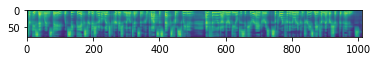

In [21]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)

text = "Turkey said Wednesday it would seek the extradition of 33 alleged Kurdish militants and coup plot suspects from Sweden and Finland under a deal to secure Ankara’s support for the Nordic countries’ NATO membership bids."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, _, _ = tacotron2.infer(processed, lengths)


plt.imshow(spec[0].cpu().detach())

torch.Size([80, 960])
torch.Size([80, 982])
torch.Size([80, 967])


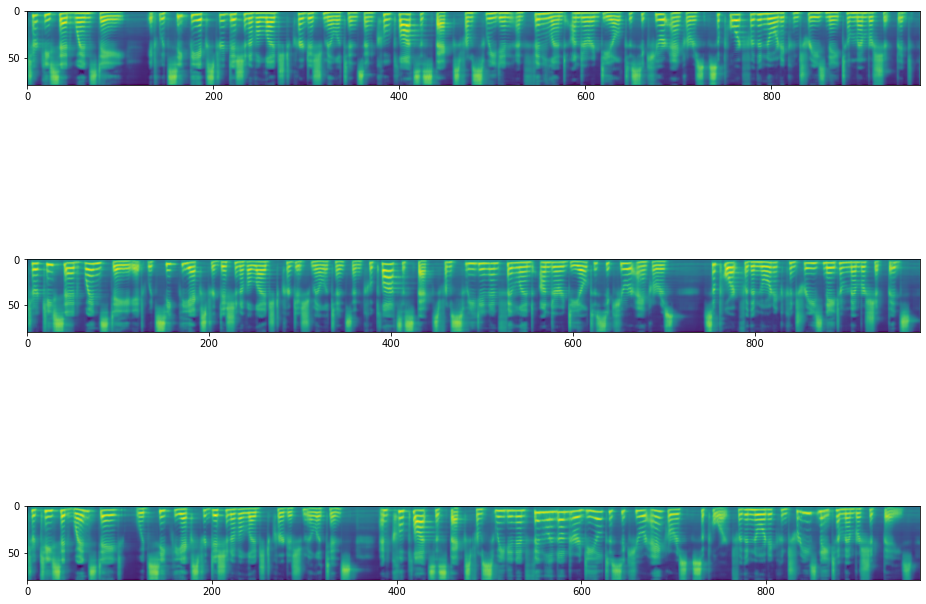

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(16, 4.3 * 3))
for i in range(3):
    with torch.inference_mode():
        spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    print(spec[0].shape)
    ax[i].imshow(spec[0].cpu().detach())
plt.show()

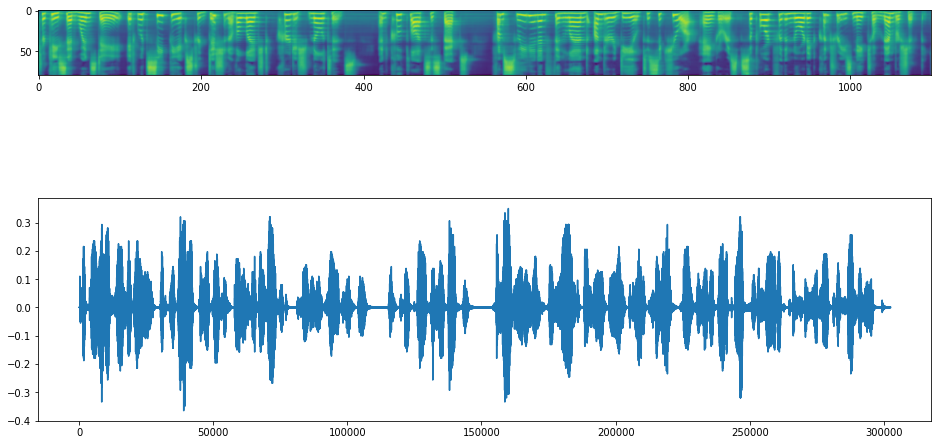

In [23]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = "Turkey said Wednesday it would seek the extradition of 33 alleged Kurdish militants and coup plot suspects from Sweden and Finland under a deal to secure Ankara’s support for the Nordic countries’ NATO membership bids."

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
    waveforms, lengths = vocoder(spec, spec_lengths)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach())
ax2.plot(waveforms[0].cpu().detach())

torchaudio.save("test_tuto1_wavernn.wav", waveforms[0:1].cpu(), sample_rate=vocoder.sample_rate)
IPython.display.Audio("test_tuto1_wavernn.wav")

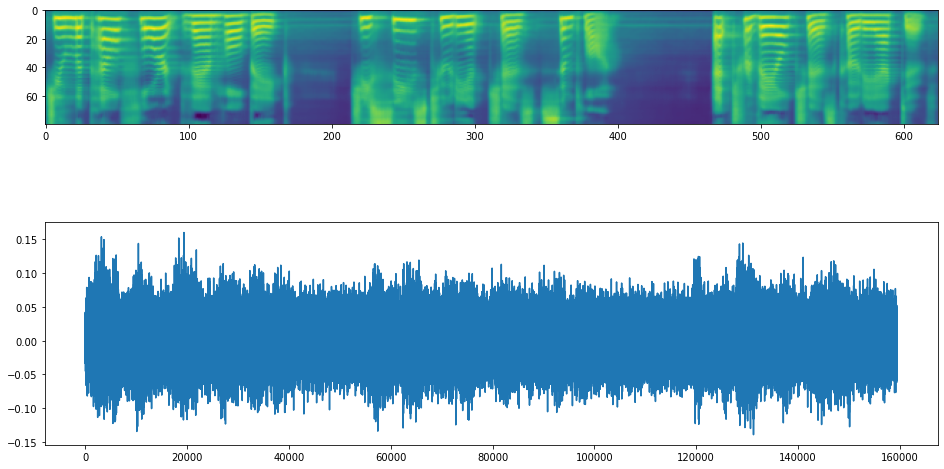

In [15]:
bundle = torchaudio.pipelines.TACOTRON2_GRIFFINLIM_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
waveforms, lengths = vocoder(spec, spec_lengths)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach())
ax2.plot(waveforms[0].cpu().detach())

torchaudio.save(
    "test2_tuto_griffinlim.wav",
    waveforms[0:1].cpu(),
    sample_rate=vocoder.sample_rate,
)
IPython.display.Audio("test2_tuto_griffinlim.wav")

c:\Users\flore\anaconda3\envs\venv-accessibility\lib\site-packages\torch\hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Using cache found in C:\Users\flore/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub
C:\Users\flore/.cache\torch\hub\NVIDIA_DeepLearningExamples_torchhub\PyTorch\Classification\ConvNets\image_classification\models\common.py:14: UserW

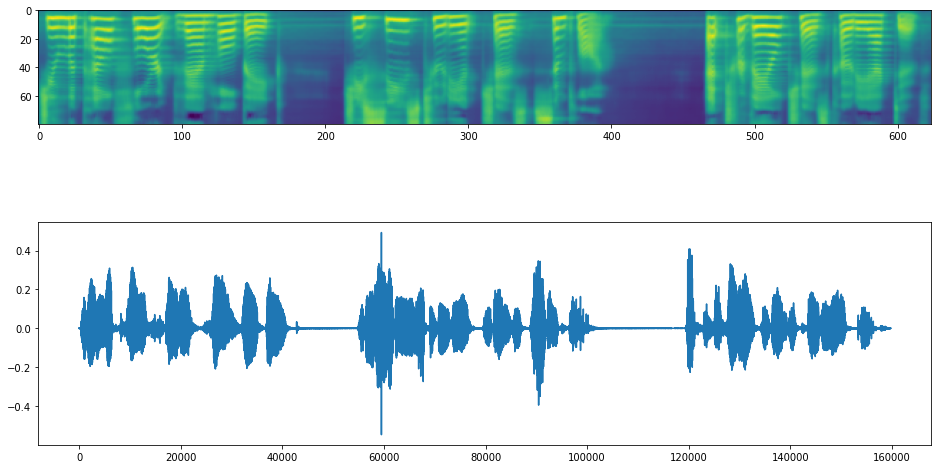

In [16]:
# Workaround to load model mapped on GPU
# https://stackoverflow.com/a/61840832
waveglow = torch.hub.load(
    "NVIDIA/DeepLearningExamples:torchhub",
    "nvidia_waveglow",
    model_math="fp32",
    pretrained=False,
)
checkpoint = torch.hub.load_state_dict_from_url(
    "https://api.ngc.nvidia.com/v2/models/nvidia/waveglowpyt_fp32/versions/1/files/nvidia_waveglowpyt_fp32_20190306.pth",  # noqa: E501
    progress=False,
    map_location=device,
)
state_dict = {key.replace("module.", ""): value for key, value in checkpoint["state_dict"].items()}

waveglow.load_state_dict(state_dict)
waveglow = waveglow.remove_weightnorm(waveglow)
waveglow = waveglow.to(device)
waveglow.eval()

with torch.no_grad():
    waveforms = waveglow.infer(spec)

fig, [ax1, ax2] = plt.subplots(2, 1, figsize=(16, 9))
ax1.imshow(spec[0].cpu().detach())
ax2.plot(waveforms[0].cpu().detach())

torchaudio.save("test3_tuto_waveglow.wav", waveforms[0:1].cpu(), sample_rate=22050)
IPython.display.Audio("test3_tuto_waveglow.wav")